# Job Interview Guide — Personalized Study Notebook for Muthuraj

![Image Description](./images/OnlineJobInterview2.png)

**Date:** 2026-02-27  
**Quiz Score:** 10/15 (67%)  
**Model Used:** Claude Opus 4.6  

---

This notebook was **automatically generated** based on your quiz performance. It focuses on the **5 topics you missed** and provides clear explanations, hands-on code exercises, and practice problems to strengthen those areas.

## What You'll Learn

1. How to **read residual plots** and understand what different patterns mean for your linear regression model
2. The **difference between R² and MSE** — what each measures, their units, and how to interpret them correctly
3. How to **compute the sigmoid function by hand** and understand the decision boundary at z=0
4. When to use **Manhattan vs. Euclidean distance** in KNN, especially with outliers
5. How to **compare models for interpretability** and choose the right one for non-technical stakeholders

## Key Vocabulary

| Term | Simple Explanation |
|------|-------------------|
| **Residual** | The difference between what the model predicted and the actual value (error for one data point) |
| **R² (R-squared)** | A score from 0 to 1 that tells you what percentage of the data's variation your model explains |
| **MSE (Mean Squared Error)** | The average of all squared errors — tells you how far off predictions are (in squared units) |
| **RMSE** | Square root of MSE — gives you the error in the same units as your target variable |
| **Sigmoid function** | An S-shaped curve that squishes any number into a value between 0 and 1 |
| **Decision boundary** | The point where the model switches from predicting one class to the other (default: probability = 0.5) |
| **Euclidean distance (L2)** | "Straight-line" distance — squares differences, so big outliers dominate |
| **Manhattan distance (L1)** | "City-block" distance — sums absolute differences, more robust to outliers |
| **Interpretability** | How easily a human (like a doctor) can understand *why* a model made a specific prediction |

## Quiz Results Summary

| # | Topic | Your Answer | Correct Answer | Result |
|---|-------|-------------|----------------|--------|
| 1 | Supervised vs. Unsupervised | B | B | ✅ |
| 2 | Dependent vs. Independent Variables | C | C | ✅ |
| 3 | Train/Val/Test Split (temporal) | C | C | ✅ |
| 4 | **Linear Regression: Residuals** | A | **C** | ❌ |
| 5 | **R² vs. MSE** | D | **C** | ❌ |
| 6 | **Sigmoid Function** | B | **C** | ❌ |
| 7 | Cross-Entropy / Log-Loss | B | B | ✅ |
| 8 | KNN: GridSearchCV | C | C | ✅ |
| 9 | **KNN: Distance Metrics** | E | **B** | ❌ |
| 10 | Decision Trees: Leaf Nodes | C | C | ✅ |
| 11 | Decision Trees: Overfitting | B | B | ✅ |
| 12 | Data Leakage / Pipelines | C | C | ✅ |
| 13 | Imbalanced Data (Behavioral) | B | B | ✅ |
| 14 | **Model Interpretability Tradeoffs** | A | **C** | ❌ |
| 15 | Putting It All Together | C | C | ✅ |

In [1]:
# Suppress warnings to keep the output clean for reading
import warnings
warnings.filterwarnings('ignore')

# Core libraries we'll use throughout this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style for all our plots
sns.set_style('whitegrid')

# random_state=42 ensures we get the same results every time we run this
RANDOM_STATE = 42

print("All libraries loaded successfully!")
print("Let's strengthen the 5 topics you missed on the quiz.")

All libraries loaded successfully!
Let's strengthen the 5 topics you missed on the quiz.


---

# Part 1: Linear Regression — Reading Residual Plots

**You missed this on Quiz Question 4.** You answered that randomly scattered residuals mean the model is overfitting. Actually, random scatter is a **good sign** — it means the linear assumption holds.

### The Big Idea

Think of residuals like a teacher grading exam answers:
- The **residual** for each data point = `actual value - predicted value` (the "error")
- If you plot all the errors and they look **random** (no patterns), it means the model captured all the real signal and only random noise is left — that's **good**!
- If you see a **curve or funnel** in the errors, the model is missing something — that's **bad**.

### What Different Residual Patterns Mean

| Pattern You See | What It Means | What To Do |
|----------------|---------------|------------|
| Random scatter around zero | ✅ Linear assumption is valid | Nothing — your model is appropriate |
| U-shaped or curved pattern | ❌ Non-linear relationship | Try polynomial features or log transform (linearization) |
| Funnel shape (wider on one side) | ❌ Heteroscedasticity (unequal variance) | Try log-transforming the target variable |
| Residuals all near zero (training) but wild (testing) | ❌ Overfitting | Simplify the model or get more data |

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# --- Generate 3 different datasets to show 3 residual patterns ---

np.random.seed(RANDOM_STATE)
x = np.linspace(0, 10, 200).reshape(-1, 1)

# Dataset 1: True linear relationship (good residuals expected)
y_linear = 3 * x.ravel() + 7 + np.random.normal(0, 3, 200)

# Dataset 2: Quadratic relationship (curved residuals expected)
y_curved = 0.5 * x.ravel()**2 + np.random.normal(0, 2, 200)

# Dataset 3: Heteroscedastic relationship (funnel residuals expected)
y_funnel = 2 * x.ravel() + np.random.normal(0, 1, 200) * x.ravel()

print("Three synthetic datasets created:")
print("1) Linear relationship (y = 3x + 7 + noise)")
print("2) Quadratic relationship (y = 0.5x² + noise)")
print("3) Heteroscedastic relationship (noise grows with x)")

Three synthetic datasets created:
1) Linear relationship (y = 3x + 7 + noise)
2) Quadratic relationship (y = 0.5x² + noise)
3) Heteroscedastic relationship (noise grows with x)


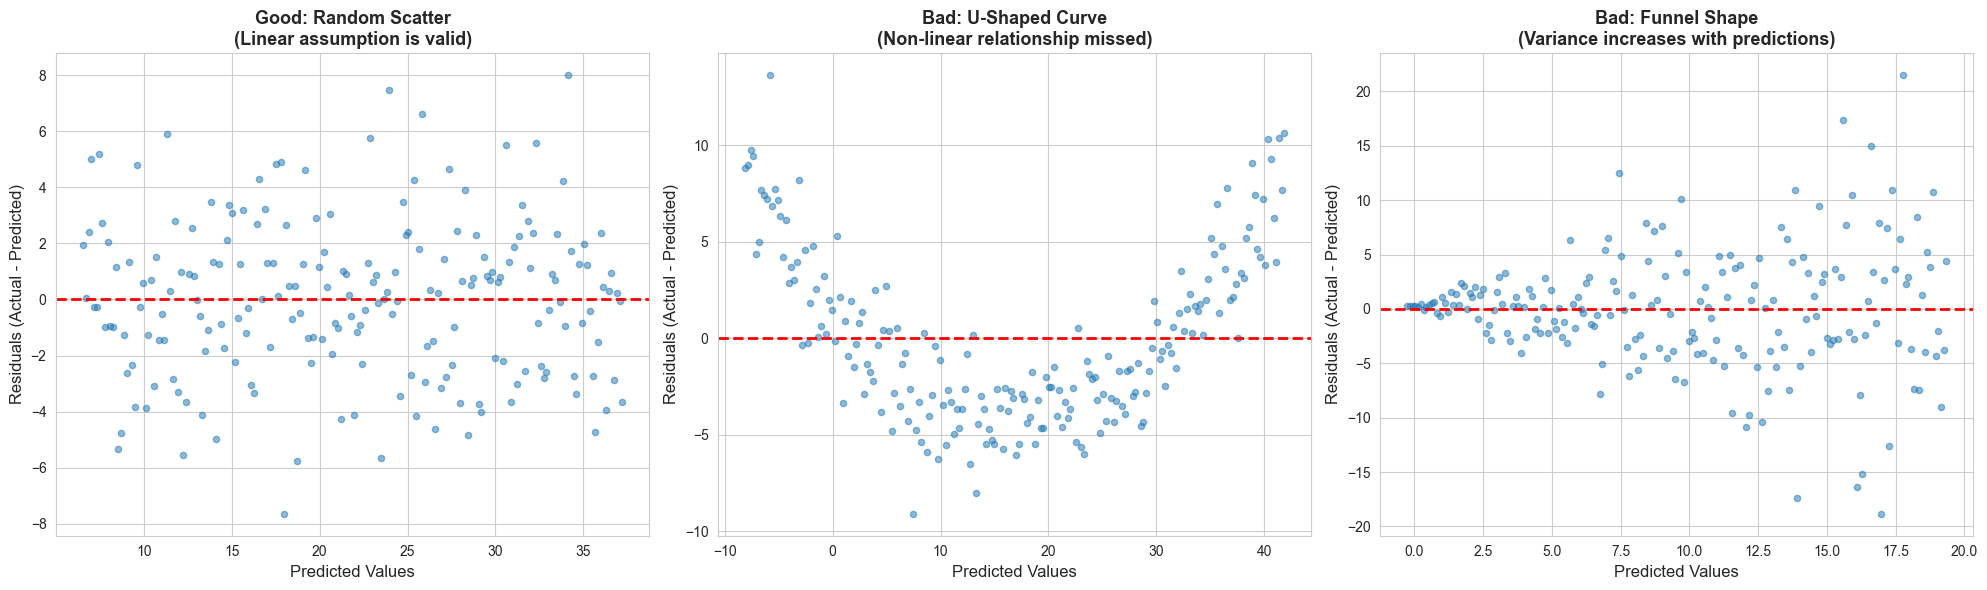

Left plot:   Random scatter around zero = GOOD. The model works well.
Middle plot: Curved pattern = BAD. A straight line can't capture a curve.
Right plot:  Funnel pattern = BAD. Errors grow as predictions get larger.


In [3]:
# Fit a simple linear regression to ALL three datasets
# (even though linear regression is only appropriate for dataset 1)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

datasets = [
    (y_linear, "Good: Random Scatter\n(Linear assumption is valid)"),
    (y_curved, "Bad: U-Shaped Curve\n(Non-linear relationship missed)"),
    (y_funnel, "Bad: Funnel Shape\n(Variance increases with predictions)")
]

for idx, (y_data, title) in enumerate(datasets):
    # Train a linear regression model
    model = LinearRegression().fit(x, y_data)
    y_pred = model.predict(x)
    
    # Calculate residuals = actual - predicted
    residuals = y_data - y_pred
    
    # Plot residuals vs predicted values
    axes[idx].scatter(y_pred, residuals, alpha=0.5, s=20)
    axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[idx].set_xlabel('Predicted Values', fontsize=12)
    axes[idx].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
    axes[idx].set_title(title, fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("Left plot:   Random scatter around zero = GOOD. The model works well.")
print("Middle plot: Curved pattern = BAD. A straight line can't capture a curve.")
print("Right plot:  Funnel pattern = BAD. Errors grow as predictions get larger.")

**What do we see here?**

- **Left plot (random scatter):** The residuals bounce randomly above and below zero with no visible pattern. This is exactly what we WANT. It means the linear model captured the real relationship, and only unpredictable noise remains.
- **Middle plot (U-shape):** The residuals form a clear curve — positive on the edges, negative in the middle. This screams "the data has a curve, but you forced a straight line!" The fix: use polynomial features or a log transform (linearization).
- **Right plot (funnel):** The residuals fan out as predictions increase. This means the model's errors are larger for bigger values — a violation of the "equal variance" assumption.

**Key takeaway:** Random scatter = good model fit. Any visible pattern = the model is missing something.

Original features shape: (200, 1)  (just x)
Polynomial features shape: (200, 2)  (x and x²)


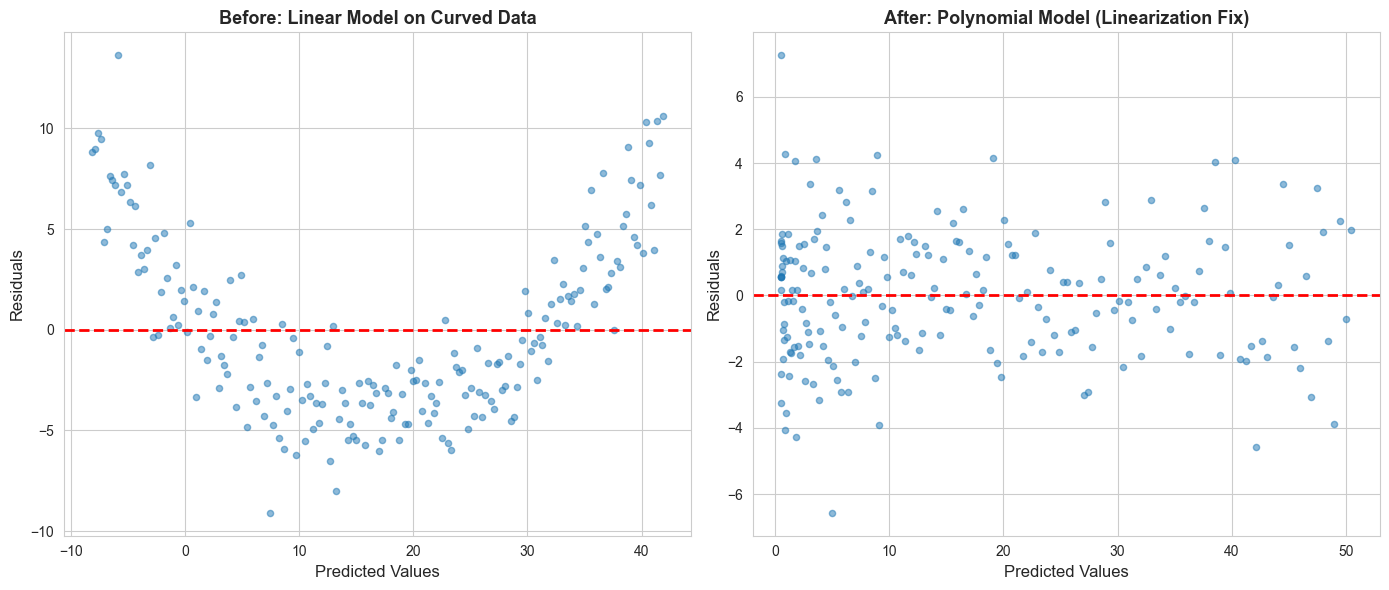


R² before linearization: 0.9162
R² after linearization:  0.9832

The polynomial model captures the curve and the residuals become random!


In [4]:
# --- Exercise 1: Residual Diagnosis Practice ---
# Let's fix the curved residuals from dataset 2 using polynomial features

# Step 1: Create polynomial features (degree 2 = adds x² as a feature)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

print(f"Original features shape: {x.shape}  (just x)")
print(f"Polynomial features shape: {x_poly.shape}  (x and x²)")

# Step 2: Fit linear regression on the polynomial features
model_poly = LinearRegression().fit(x_poly, y_curved)
y_pred_poly = model_poly.predict(x_poly)
residuals_poly = y_curved - y_pred_poly

# Step 3: Compare residual plots — before and after linearization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before: linear model on curved data
model_bad = LinearRegression().fit(x, y_curved)
residuals_bad = y_curved - model_bad.predict(x)
axes[0].scatter(model_bad.predict(x), residuals_bad, alpha=0.5, s=20)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Before: Linear Model on Curved Data', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Values', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)

# After: polynomial model on curved data
axes[1].scatter(y_pred_poly, residuals_poly, alpha=0.5, s=20)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('After: Polynomial Model (Linearization Fix)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)

plt.tight_layout()
plt.show()

# Compare R² scores
r2_before = r2_score(y_curved, model_bad.predict(x))
r2_after = r2_score(y_curved, y_pred_poly)
print(f"\nR² before linearization: {r2_before:.4f}")
print(f"R² after linearization:  {r2_after:.4f}")
print(f"\nThe polynomial model captures the curve and the residuals become random!")

**Key Insight**

- The left plot shows the **U-shaped pattern** we saw before — the linear model can't handle the curve.
- The right plot shows **random scatter** after adding polynomial features — the curve has been captured!
- R² jumps dramatically because the model now fits the data's true shape.
- This technique — transforming features so a linear model can handle non-linear relationships — is called **linearization**.

Now that we understand residuals, let's move on to the metrics that summarize model quality numerically...

---

# Part 2: Regression Metrics — R² vs. MSE

**You missed this on Quiz Question 5.** You said R² and MSE measure the same thing on different scales. They actually measure **different things entirely**.

### The Analogy

Think of it like grading a student's exam:
- **MSE** is like counting the total number of **points lost** across all questions. It tells you "how many points did they miss?" — an absolute measure in the same units as the exam.
- **R²** is like asking "what **percentage** of the material did they understand?" — a relative measure between 0% and 100%.

A student could lose 20 points (MSE) on an easy 50-point test (R² = 0.60) or lose 20 points on a hard 200-point test (R² = 0.90). Same absolute error, very different relative performance.

### Side-by-Side Comparison

| Feature | MSE | R² |
|---------|-----|----|
| **What it measures** | Average squared prediction error | Proportion of variance explained |
| **Units** | Squared units of target (e.g., Amps²) | Unitless (0 to 1) |
| **Perfect score** | 0 (no errors) | 1.0 (explains everything) |
| **Worst score** | ∞ (huge errors) | 0 or negative (worse than guessing the mean) |
| **Can compare across datasets?** | No (depends on target scale) | Yes (always 0-1 scale) |
| **Formula** | (1/n) × Σ(actual - predicted)² | 1 - (Σ(actual - predicted)² / Σ(actual - mean)²) |

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# --- Demo: R² and MSE tell you DIFFERENT things ---

# Create two datasets with very different scales
# Dataset A: small target values (e.g., temperature in Celsius)
X_a, y_a = make_regression(n_samples=200, n_features=1, noise=5, random_state=RANDOM_STATE)

# Dataset B: large target values (e.g., house prices in thousands)
X_b, y_b = make_regression(n_samples=200, n_features=1, noise=50, random_state=RANDOM_STATE)
y_b = y_b * 10  # Scale up to simulate larger target values

# Train linear regression on both
model_a = LinearRegression().fit(X_a, y_a)
model_b = LinearRegression().fit(X_b, y_b)

pred_a = model_a.predict(X_a)
pred_b = model_b.predict(X_b)

# Compute metrics
results = pd.DataFrame({
    'Dataset': ['A (small scale)', 'B (large scale)'],
    'MSE': [mean_squared_error(y_a, pred_a), mean_squared_error(y_b, pred_b)],
    'RMSE': [np.sqrt(mean_squared_error(y_a, pred_a)), np.sqrt(mean_squared_error(y_b, pred_b))],
    'R²': [r2_score(y_a, pred_a), r2_score(y_b, pred_b)]
})

print("Comparing MSE and R² across two datasets with different scales:\n")
print(results.to_string(index=False))

print("\n--- Observations ---")
print("MSE is MUCH larger for Dataset B — but that's just because the target values are bigger.")
print("R² is similar for both — both models explain a similar proportion of variance.")
print("\nThis is why R² is useful for comparing models across different datasets,")
print("while MSE tells you the actual error magnitude within one dataset.")

Comparing MSE and R² across two datasets with different scales:

        Dataset           MSE       RMSE       R²
A (small scale)     25.407795   5.040615 0.996171
B (large scale) 254077.952259 504.061457 0.714583

--- Observations ---
MSE is MUCH larger for Dataset B — but that's just because the target values are bigger.
R² is similar for both — both models explain a similar proportion of variance.

This is why R² is useful for comparing models across different datasets,
while MSE tells you the actual error magnitude within one dataset.


In [6]:
# --- Exercise 2: Interpret R² values correctly ---
# This is the exact scenario from Quiz Question 5

# From your Robot Predictive Maintenance workshop:
r_squared = 0.0046
mse = 70.99

print("=" * 60)
print("QUIZ QUESTION 5 — Let's break it down")
print("=" * 60)
print(f"\nR² = {r_squared}")
print(f"MSE = {mse}")

# Common mistake: misreading the decimal
print(f"\n❌ WRONG interpretation: 'R² = 0.0046 means 46% variance explained'")
print(f"   0.0046 is NOT 46%. To convert to percentage: 0.0046 × 100 = 0.46%")

print(f"\n✅ CORRECT interpretation: 'R² = 0.0046 means only 0.46% variance explained'")
print(f"   The model explains almost NOTHING. It's barely better than predicting the mean.")

# RMSE gives us the error in original units
rmse = np.sqrt(mse)
print(f"\nRMSE = √MSE = √{mse} = {rmse:.2f} Amps")
print(f"This means predictions are off by about {rmse:.2f} Amps on average.")

print(f"\n--- Key Distinction ---")
print(f"MSE = {mse} Amps² → tells you HOW FAR OFF predictions are (absolute error)")
print(f"R²  = {r_squared} → tells you HOW MUCH VARIANCE is explained (relative fit quality)")
print(f"They measure DIFFERENT things. MSE could be low while R² is also low,")
print(f"if the target variable itself doesn't vary much.")

QUIZ QUESTION 5 — Let's break it down

R² = 0.0046
MSE = 70.99

❌ WRONG interpretation: 'R² = 0.0046 means 46% variance explained'
   0.0046 is NOT 46%. To convert to percentage: 0.0046 × 100 = 0.46%

✅ CORRECT interpretation: 'R² = 0.0046 means only 0.46% variance explained'
   The model explains almost NOTHING. It's barely better than predicting the mean.

RMSE = √MSE = √70.99 = 8.43 Amps
This means predictions are off by about 8.43 Amps on average.

--- Key Distinction ---
MSE = 70.99 Amps² → tells you HOW FAR OFF predictions are (absolute error)
R²  = 0.0046 → tells you HOW MUCH VARIANCE is explained (relative fit quality)
They measure DIFFERENT things. MSE could be low while R² is also low,
if the target variable itself doesn't vary much.


**Key Insight**

- **R² = 0.0046** does NOT mean 46%. It means **0.46%** — watch that decimal! Always multiply by 100 to get the percentage.
- **MSE = 70.99** is in **squared** units (Amps²). Take the square root to get RMSE = 8.43 Amps — that's the average error in the original units.
- They measure **different things**: MSE = "how far off?" (absolute), R² = "how much explained?" (relative).
- A model can have a low MSE but still a low R² if the target variable barely varies.

Now that we have a solid grasp on regression metrics, let's switch gears to classification and the sigmoid function...

---

# Part 3: Logistic Regression — The Sigmoid Function

**You missed this on Quiz Question 6.** You said σ(0) = 1. Actually, σ(0) = **0.5** — the decision boundary.

### The Analogy

Think of the sigmoid function like a **dimmer switch** for a light:
- Turn the dial far to the left (z very negative) → light is OFF (probability ≈ 0)
- Turn it far to the right (z very positive) → light is fully ON (probability ≈ 1)
- Dial is in the middle (z = 0) → light is at **exactly 50% brightness** (probability = 0.5)

The sigmoid function takes ANY number and squishes it into the range (0, 1) — perfect for probabilities!

### The Formula

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where:
- **z** = the model's raw score (intercept + slope × feature value)
- **e** ≈ 2.718 (Euler's number — a mathematical constant)
- The output is always between 0 and 1

In [7]:
# --- Let's compute sigmoid by hand for several z values ---

def sigmoid(z):
    """The sigmoid function: squishes any number into the range (0, 1)."""
    return 1 / (1 + np.exp(-z))


# Compute sigmoid for key z values
z_values = [-10, -5, -2, -1, 0, 1, 2, 5, 10]

print("Let's compute σ(z) step by step:\n")
print(f"{'z':>5}  |  {'e^(-z)':>10}  |  {'1 + e^(-z)':>12}  |  {'σ(z)':>8}  |  Interpretation")
print("-" * 80)

for z in z_values:
    exp_neg_z = np.exp(-z)
    denominator = 1 + exp_neg_z
    sigma = sigmoid(z)
    
    # Interpretation
    if sigma < 0.3:
        interp = "Confident class 0"
    elif sigma < 0.5:
        interp = "Leaning class 0"
    elif sigma == 0.5:
        interp = "<-- DECISION BOUNDARY (50/50)"
    elif sigma < 0.7:
        interp = "Leaning class 1"
    else:
        interp = "Confident class 1"
    
    print(f"{z:>5}  |  {exp_neg_z:>10.4f}  |  {denominator:>12.4f}  |  {sigma:>8.4f}  |  {interp}")

print("\n--- The Quiz Question Walkthrough ---")
print(f"σ(0) = 1 / (1 + e^(-0)) = 1 / (1 + e^0) = 1 / (1 + 1) = 1/2 = 0.5")
print(f"At z=0, the model is MAXIMALLY UNCERTAIN — exactly 50/50.")
print(f"This is why 0.5 is the default decision threshold!")

Let's compute σ(z) step by step:

    z  |      e^(-z)  |    1 + e^(-z)  |      σ(z)  |  Interpretation
--------------------------------------------------------------------------------
  -10  |  22026.4658  |    22027.4658  |    0.0000  |  Confident class 0
   -5  |    148.4132  |      149.4132  |    0.0067  |  Confident class 0
   -2  |      7.3891  |        8.3891  |    0.1192  |  Confident class 0
   -1  |      2.7183  |        3.7183  |    0.2689  |  Confident class 0
    0  |      1.0000  |        2.0000  |    0.5000  |  <-- DECISION BOUNDARY (50/50)
    1  |      0.3679  |        1.3679  |    0.7311  |  Confident class 1
    2  |      0.1353  |        1.1353  |    0.8808  |  Confident class 1
    5  |      0.0067  |        1.0067  |    0.9933  |  Confident class 1
   10  |      0.0000  |        1.0000  |    1.0000  |  Confident class 1

--- The Quiz Question Walkthrough ---
σ(0) = 1 / (1 + e^(-0)) = 1 / (1 + e^0) = 1 / (1 + 1) = 1/2 = 0.5
At z=0, the model is MAXIMALLY UNCERTAIN 

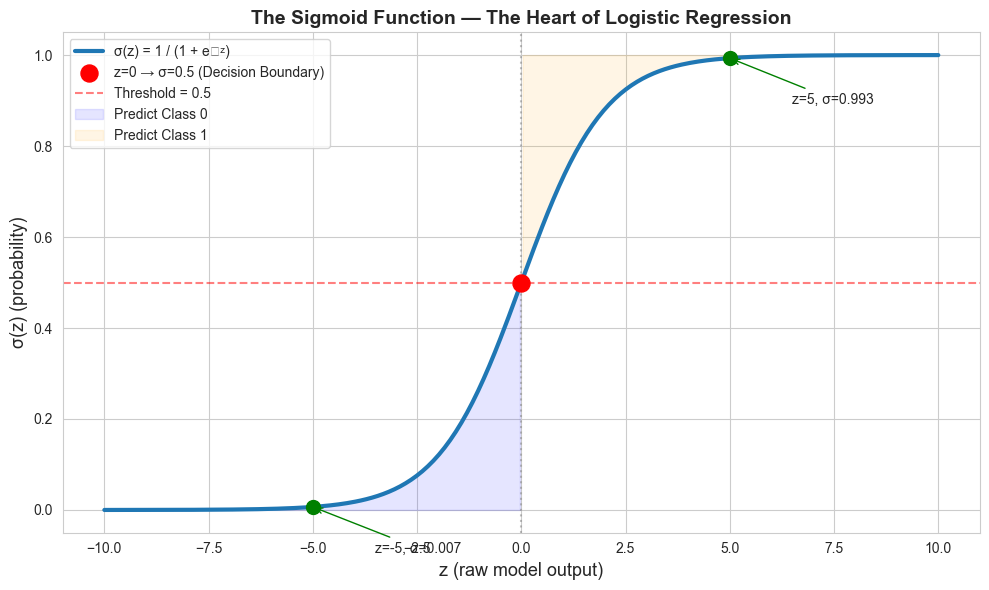

The S-curve maps ANY number to a probability between 0 and 1.
z < 0 → σ < 0.5 → predict class 0
z = 0 → σ = 0.5 → maximally uncertain (decision boundary)
z > 0 → σ > 0.5 → predict class 1


In [8]:
# --- Visualize the S-curve with key points marked ---

z_range = np.linspace(-10, 10, 300)
sigma_values = sigmoid(z_range)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sigmoid curve
ax.plot(z_range, sigma_values, linewidth=3, label='σ(z) = 1 / (1 + e⁻ᶻ)')

# Mark the decision boundary at z=0, σ=0.5
ax.scatter([0], [0.5], color='red', s=150, zorder=5, label='z=0 → σ=0.5 (Decision Boundary)')
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.5')
ax.axvline(x=0, color='gray', linestyle=':', alpha=0.5)

# Mark a few other key points
key_points = [(-5, sigmoid(-5)), (5, sigmoid(5))]
for z_pt, s_pt in key_points:
    ax.scatter([z_pt], [s_pt], color='green', s=100, zorder=5)
    ax.annotate(f'z={z_pt}, σ={s_pt:.3f}', xy=(z_pt, s_pt), 
                xytext=(z_pt + 1.5, s_pt - 0.1), fontsize=10,
                arrowprops=dict(arrowstyle='->', color='green'))

# Labels and regions
ax.fill_between(z_range, 0, sigma_values, where=(sigma_values < 0.5), alpha=0.1, color='blue', label='Predict Class 0')
ax.fill_between(z_range, sigma_values, 1, where=(sigma_values >= 0.5), alpha=0.1, color='orange', label='Predict Class 1')

ax.set_xlabel('z (raw model output)', fontsize=13)
ax.set_ylabel('σ(z) (probability)', fontsize=13)
ax.set_title('The Sigmoid Function — The Heart of Logistic Regression', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

print("The S-curve maps ANY number to a probability between 0 and 1.")
print("z < 0 → σ < 0.5 → predict class 0")
print("z = 0 → σ = 0.5 → maximally uncertain (decision boundary)")
print("z > 0 → σ > 0.5 → predict class 1")

Trained Logistic Regression Model:
  Intercept (β₀) = -5.3374
  Slope (β₁)     = 1.0174

The model computes: z = -5.3374 + 1.0174 × hours
Then feeds z into the sigmoid: probability = σ(z)

Decision boundary at: hours = --5.3374 / 1.0174 = 5.25 hours
Students who study more than 5.2 hours are predicted to PASS.


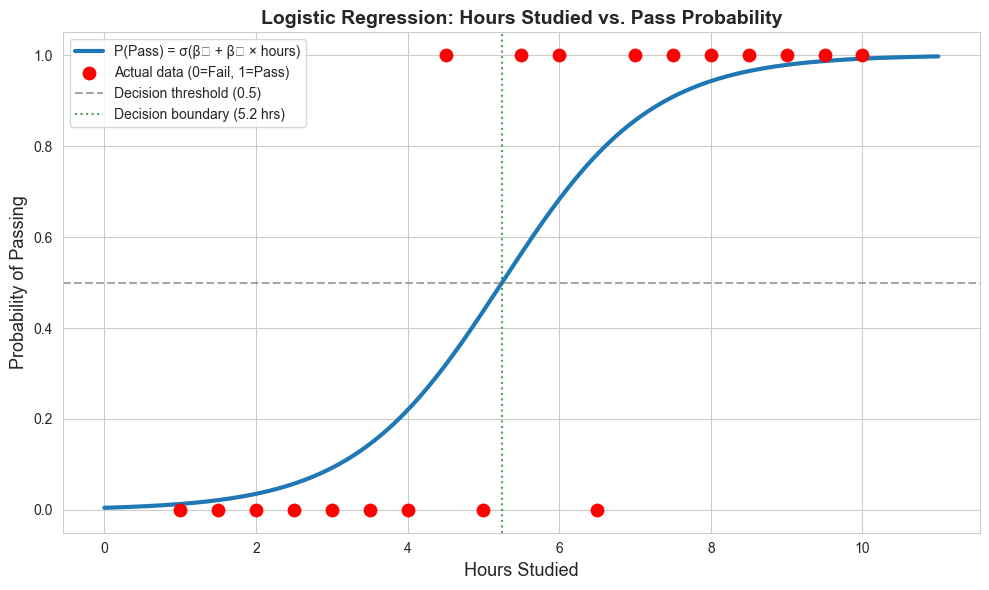

In [9]:
# --- Exercise 3: Sigmoid + Logistic Regression on real data ---
# Let's see how intercept and slope connect to the sigmoid

from sklearn.linear_model import LogisticRegression

# Simple dataset: hours studied vs pass/fail (from your workshop)
hours_studied = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# Train logistic regression
log_reg = LogisticRegression(random_state=RANDOM_STATE)
log_reg.fit(hours_studied, passed)

intercept = log_reg.intercept_[0]
slope = log_reg.coef_[0][0]

print(f"Trained Logistic Regression Model:")
print(f"  Intercept (β₀) = {intercept:.4f}")
print(f"  Slope (β₁)     = {slope:.4f}")
print(f"\nThe model computes: z = {intercept:.4f} + {slope:.4f} × hours")
print(f"Then feeds z into the sigmoid: probability = σ(z)")

# Find the decision boundary: where σ(z) = 0.5, which means z = 0
# z = intercept + slope * hours = 0  →  hours = -intercept / slope
boundary_hours = -intercept / slope
print(f"\nDecision boundary at: hours = -{intercept:.4f} / {slope:.4f} = {boundary_hours:.2f} hours")
print(f"Students who study more than {boundary_hours:.1f} hours are predicted to PASS.")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x_plot = np.linspace(0, 11, 300).reshape(-1, 1)
probabilities = log_reg.predict_proba(x_plot)[:, 1]

ax.plot(x_plot, probabilities, linewidth=3, label='P(Pass) = σ(β₀ + β₁ × hours)')
ax.scatter(hours_studied, passed, color='red', s=80, zorder=5, label='Actual data (0=Fail, 1=Pass)')
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Decision threshold (0.5)')
ax.axvline(x=boundary_hours, color='green', linestyle=':', alpha=0.7, label=f'Decision boundary ({boundary_hours:.1f} hrs)')

ax.set_xlabel('Hours Studied', fontsize=13)
ax.set_ylabel('Probability of Passing', fontsize=13)
ax.set_title('Logistic Regression: Hours Studied vs. Pass Probability', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

**Key Insight**

- The **intercept** (β₀) shifts the S-curve left or right — it controls where the decision boundary falls.
- The **slope** (β₁) controls how steep the curve is — a steeper curve means the model is more decisive (transitions quickly from 0 to 1).
- The **decision boundary** is where z = 0 (so σ = 0.5). For a single feature: `boundary = -intercept / slope`.
- At z = 0, the sigmoid outputs **exactly 0.5** — this is the mathematical fact you missed on the quiz.

Now let's tackle the KNN distance metric question...

---

# Part 4: KNN — Distance Metrics and Outliers

**You missed this on Quiz Question 9.** You chose to remove outliers rather than switching the distance metric. While outlier removal can sometimes help, in medical data extreme values are often **clinically meaningful** (e.g., a very high glucose reading is real, not noise). The better approach is to use a **distance metric that is robust to outliers**.

### The Analogy

Imagine you're comparing two students based on their grades in Math and English:
- **Student A:** Math = 85, English = 82
- **Student B:** Math = 88, English = 80
- **Student C:** Math = 85, English = 200 (data entry error? or a genius?)

**Euclidean distance** (L2) between A and C:
- √((85-85)² + (82-200)²) = √(0 + 13924) = **118.0**
- The outlier in English **completely dominates** because squaring amplifies big differences.

**Manhattan distance** (L1) between A and C:
- |85-85| + |82-200| = 0 + 118 = **118**
- Same number here, but with multiple features, Manhattan spreads the influence more evenly.

### When Does It Really Matter?

With more features, the difference becomes dramatic. Let's see it in code.

In [10]:
from scipy.spatial.distance import euclidean, cityblock

# --- Demo: How outliers affect Euclidean vs Manhattan distance ---

# Two patients with 5 medical features
patient_a = np.array([120, 25, 72, 30, 80])     # glucose, BMI, BP, skin, insulin
patient_b = np.array([125, 27, 75, 32, 85])     # similar to patient A
patient_c = np.array([122, 26, 73, 31, 500])    # similar, but EXTREME insulin (outlier)

print("Patient features: [Glucose, BMI, BloodPressure, SkinThickness, Insulin]")
print(f"Patient A: {patient_a}")
print(f"Patient B: {patient_b}  (similar to A in all features)")
print(f"Patient C: {patient_c}  (similar to A, but extreme insulin = 500)")

print("\n--- Distances from Patient A ---")
print(f"{'':>25} {'Euclidean (L2)':>15} {'Manhattan (L1)':>15}")
print(f"{'To Patient B (normal)':>25} {euclidean(patient_a, patient_b):>15.2f} {cityblock(patient_a, patient_b):>15.2f}")
print(f"{'To Patient C (outlier)':>25} {euclidean(patient_a, patient_c):>15.2f} {cityblock(patient_a, patient_c):>15.2f}")

# Show the ratio of how much the outlier inflates the distance
euc_ratio = euclidean(patient_a, patient_c) / euclidean(patient_a, patient_b)
man_ratio = cityblock(patient_a, patient_c) / cityblock(patient_a, patient_b)

print(f"\n--- Inflation Ratio (outlier distance / normal distance) ---")
print(f"Euclidean: Patient C appears {euc_ratio:.1f}x farther than Patient B")
print(f"Manhattan: Patient C appears {man_ratio:.1f}x farther than Patient B")
print(f"\nEuclidean exaggerates the outlier's effect by {euc_ratio/man_ratio:.1f}x more than Manhattan!")

Patient features: [Glucose, BMI, BloodPressure, SkinThickness, Insulin]
Patient A: [120  25  72  30  80]
Patient B: [125  27  75  32  85]  (similar to A in all features)
Patient C: [122  26  73  31 500]  (similar to A, but extreme insulin = 500)

--- Distances from Patient A ---
                           Euclidean (L2)  Manhattan (L1)
    To Patient B (normal)            8.19           17.00
   To Patient C (outlier)          420.01          425.00

--- Inflation Ratio (outlier distance / normal distance) ---
Euclidean: Patient C appears 51.3x farther than Patient B
Manhattan: Patient C appears 25.0x farther than Patient B

Euclidean exaggerates the outlier's effect by 2.1x more than Manhattan!


In [11]:
# --- Why squaring matters: breaking down the distance components ---

feature_names = ['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']
diffs = patient_c - patient_a  # raw differences

breakdown = pd.DataFrame({
    'Feature': feature_names,
    'Patient A': patient_a,
    'Patient C': patient_c,
    'Difference': diffs,
    'L1 Contribution (|diff|)': np.abs(diffs),
    'L2 Contribution (diff²)': diffs**2
})

print("Feature-by-feature distance breakdown (Patient A vs Patient C):\n")
print(breakdown.to_string(index=False))

print(f"\nL1 total = sum of |diff| = {np.sum(np.abs(diffs))}")
print(f"L2 total = sqrt(sum of diff²) = sqrt({np.sum(diffs**2)}) = {np.sqrt(np.sum(diffs**2)):.2f}")

# What percentage of the total distance comes from Insulin?
l1_insulin_pct = np.abs(diffs[-1]) / np.sum(np.abs(diffs)) * 100
l2_insulin_pct = diffs[-1]**2 / np.sum(diffs**2) * 100

print(f"\nInsulin's share of total distance:")
print(f"  Manhattan (L1): {l1_insulin_pct:.1f}% — Insulin matters, but other features still count")
print(f"  Euclidean (L2): {l2_insulin_pct:.1f}% — Insulin DOMINATES everything else")

Feature-by-feature distance breakdown (Patient A vs Patient C):

      Feature  Patient A  Patient C  Difference  L1 Contribution (|diff|)  L2 Contribution (diff²)
      Glucose        120        122           2                         2                        4
          BMI         25         26           1                         1                        1
BloodPressure         72         73           1                         1                        1
SkinThickness         30         31           1                         1                        1
      Insulin         80        500         420                       420                   176400

L1 total = sum of |diff| = 425
L2 total = sqrt(sum of diff²) = sqrt(176407) = 420.01

Insulin's share of total distance:
  Manhattan (L1): 98.8% — Insulin matters, but other features still count
  Euclidean (L2): 100.0% — Insulin DOMINATES everything else


In [12]:
# --- Exercise 4: Compare KNN with Euclidean vs Manhattan on data with outliers ---

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

# Create a dataset with some outlier features
np.random.seed(RANDOM_STATE)
X_clean, y_clean = make_classification(
    n_samples=500, n_features=5, n_informative=3,
    n_redundant=0, random_state=RANDOM_STATE
)

# Inject outliers into one feature (simulating extreme insulin readings)
X_outlier = X_clean.copy()
outlier_mask = np.random.random(500) < 0.05  # 5% of samples get outliers
X_outlier[outlier_mask, 0] = X_outlier[outlier_mask, 0] * 20  # extreme values

print(f"Dataset: {X_outlier.shape[0]} samples, {X_outlier.shape[1]} features")
print(f"Outliers injected into feature 0 for {outlier_mask.sum()} samples ({outlier_mask.mean()*100:.0f}%)")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_outlier, y_clean, test_size=0.20, stratify=y_clean, random_state=RANDOM_STATE
)

# Compare Euclidean vs Manhattan with a Pipeline (prevents data leakage!)
metrics_to_test = ['euclidean', 'manhattan']
comparison_results = []

for metric in metrics_to_test:
    # Pipeline ensures scaler is fit only on training data
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5, metric=metric, weights='distance'))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    comparison_results.append({
        'Distance Metric': metric.capitalize(),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(comparison_results)
print("\nKNN Performance with Outlier-Contaminated Data:\n")
print(results_df.to_string(index=False))
print("\nManhattan is more robust to the outliers because it doesn't square the differences.")

Dataset: 500 samples, 5 features
Outliers injected into feature 0 for 31 samples (6%)

KNN Performance with Outlier-Contaminated Data:

Distance Metric  Accuracy  F1 Score
      Euclidean      0.92  0.916667
      Manhattan      0.94  0.937500

Manhattan is more robust to the outliers because it doesn't square the differences.


**Key Insight**

- **Euclidean (L2)** squares differences → outliers get amplified → one extreme feature can dominate the entire distance calculation.
- **Manhattan (L1)** uses absolute differences → outliers still contribute, but proportionally, not quadratically.
- **Removing outliers** (your quiz answer) isn't always appropriate — in medical data, extreme values are often real and clinically important. The better approach is to choose a **robust distance metric**.
- Always remember: **scale your features first** (StandardScaler) and put it inside a **Pipeline** to prevent data leakage.

One more topic to cover — model interpretability...

---

# Part 5: Model Interpretability — Choosing the Right Model for the Audience

**You missed this on Quiz Question 14.** You chose KNN for its non-parametric nature, but the question asked for **interpretability** — how easily a non-technical person can understand the model's reasoning.

### The Analogy

Imagine explaining to a doctor *why* a patient was flagged as high-risk:

- **Decision Tree says:** "Because the patient's glucose is above 140 AND their BMI is above 35. Here's a flowchart showing exactly how I decided." → The doctor can **read it, verify it, and trust it**.

- **Logistic Regression says:** "The patient's risk score = -4.2 + 0.03 × glucose + 0.08 × BMI + ... Each unit of BMI increases the log-odds by 0.08." → A data-savvy doctor can understand this, but **log-odds aren't intuitive** for most people.

- **KNN says:** "These 5 other patients in the database were similar to yours, and 4 of them were high-risk." → But the doctor asks: *"Similar how? Which features mattered? Can I see the rule?"* → **KNN has no rule to show.**

### Interpretability Comparison

| Model | Interpretability | What It Can Explain | Best For |
|-------|-----------------|--------------------|---------|
| **Decision Tree** | Highest | Visual if/then flowchart, exact rules | Non-technical stakeholders (doctors, managers) |
| **Logistic Regression** | High | Feature coefficients, odds ratios | Technical audiences who understand statistics |
| **KNN** | Low | "Similar neighbors voted" — no explicit rules | When interpretability isn't the priority |

In [13]:
# --- Exercise 5: See the interpretability difference yourself ---

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer

# Load a real medical dataset
data = load_breast_cancer()
X_cancer = pd.DataFrame(data.data, columns=data.feature_names)
y_cancer = data.target  # 0 = malignant, 1 = benign

# Use just 4 key features to keep it readable
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
X_selected = X_cancer[selected_features]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_selected, y_cancer, test_size=0.20, stratify=y_cancer, random_state=RANDOM_STATE
)

print(f"Breast Cancer dataset: {X_selected.shape[0]} samples, {len(selected_features)} features")
print(f"Features: {selected_features}")
print(f"Target: 0 = Malignant, 1 = Benign")
print(f"Train: {len(X_train_c)}, Test: {len(X_test_c)}")

Breast Cancer dataset: 569 samples, 4 features
Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
Target: 0 = Malignant, 1 = Benign
Train: 455, Test: 114


Decision Tree Test Accuracy: 0.8947


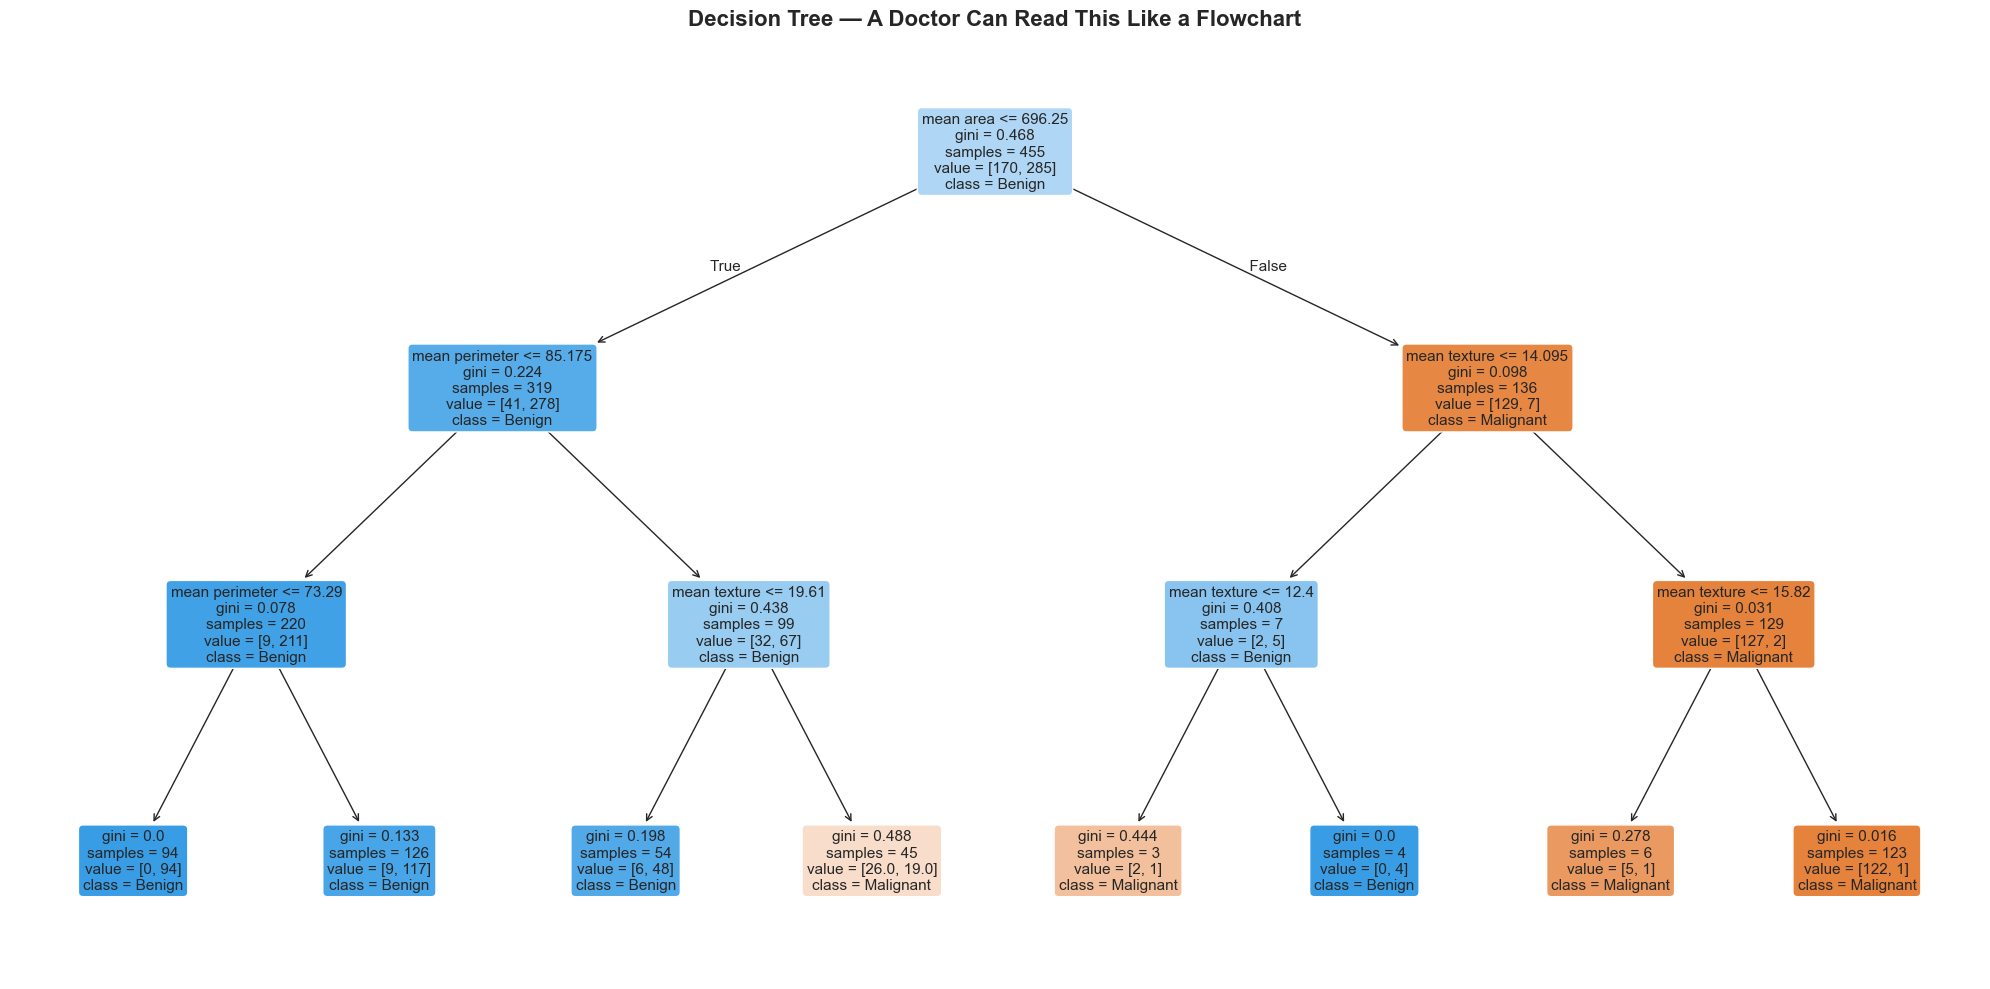

A doctor can follow this tree from top to bottom:
  'If mean perimeter <= X, go left. Otherwise, go right.'
  At each leaf: 'Predict Malignant' or 'Predict Benign'.
  No math degree required!


In [14]:
# --- Model 1: Decision Tree (MOST interpretable) ---

# max_depth=3 keeps the tree small enough for a human to read
dt_model = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
dt_model.fit(X_train_c, y_train_c)

dt_acc = accuracy_score(y_test_c, dt_model.predict(X_test_c))
print(f"Decision Tree Test Accuracy: {dt_acc:.4f}")

# Visualize the tree — THIS is what makes it interpretable
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=selected_features,
    class_names=['Malignant', 'Benign'],
    filled=True,
    rounded=True,
    fontsize=11,
    ax=ax
)
ax.set_title('Decision Tree — A Doctor Can Read This Like a Flowchart', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("A doctor can follow this tree from top to bottom:")
print("  'If mean perimeter <= X, go left. Otherwise, go right.'")
print("  At each leaf: 'Predict Malignant' or 'Predict Benign'.")
print("  No math degree required!")

In [15]:
# --- Model 2: Logistic Regression (interpretable to technical people) ---

from sklearn.pipeline import Pipeline

log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])
log_pipe.fit(X_train_c, y_train_c)

log_acc = accuracy_score(y_test_c, log_pipe.predict(X_test_c))
print(f"Logistic Regression Test Accuracy: {log_acc:.4f}\n")

# Show the coefficients — this IS the interpretability
coefs = log_pipe.named_steps['clf'].coef_[0]
intercept_lr = log_pipe.named_steps['clf'].intercept_[0]

coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefs,
    'Interpretation': [
        'Higher radius → more likely malignant' if c < 0 else 'Higher radius → more likely benign'
        for c in coefs
    ]
})
coef_df = coef_df.sort_values('Coefficient')

print(f"Intercept: {intercept_lr:.4f}\n")
print("Feature Coefficients (what each feature contributes to the prediction):")
print(coef_df.to_string(index=False))

print("\nA data-savvy doctor could say: 'Larger mean area pushes toward benign,")
print("while larger mean perimeter pushes toward malignant.'")
print("But explaining 'log-odds' to a non-technical person is harder than a flowchart.")

Logistic Regression Test Accuracy: 0.8947

Intercept: 0.6160

Feature Coefficients (what each feature contributes to the prediction):
       Feature  Coefficient                        Interpretation
mean perimeter    -2.729646 Higher radius → more likely malignant
  mean texture    -0.847161 Higher radius → more likely malignant
     mean area    -0.521515 Higher radius → more likely malignant
   mean radius    -0.454593 Higher radius → more likely malignant

A data-savvy doctor could say: 'Larger mean area pushes toward benign,
while larger mean perimeter pushes toward malignant.'
But explaining 'log-odds' to a non-technical person is harder than a flowchart.


In [16]:
# --- Model 3: KNN (LEAST interpretable) ---

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance'))
])
knn_pipe.fit(X_train_c, y_train_c)

knn_acc = accuracy_score(y_test_c, knn_pipe.predict(X_test_c))
print(f"KNN Test Accuracy: {knn_acc:.4f}\n")

# KNN can tell you WHO the neighbors are, but not WHY the decision was made
sample = X_test_c.iloc[[0]]
distances, indices = knn_pipe.named_steps['clf'].kneighbors(
    knn_pipe.named_steps['scaler'].transform(sample)
)

print(f"For test sample 0, KNN found these 5 nearest neighbors:")
print(f"  Neighbor indices in training set: {indices[0]}")
print(f"  Distances: {distances[0].round(3)}")
print(f"  Their labels: {y_train_c[indices[0]]}")
print(f"  Prediction: {'Benign' if knn_pipe.predict(sample)[0] == 1 else 'Malignant'}")

print("\nIf a doctor asks 'WHY is this malignant?', KNN can only say:")
print("  'Because 4 out of 5 similar patients were malignant.'")
print("  Doctor: 'Similar HOW? Which features mattered most?'")
print("  KNN: '... I don't have explicit rules to show you.'")

KNN Test Accuracy: 0.8772

For test sample 0, KNN found these 5 nearest neighbors:
  Neighbor indices in training set: [295  79 284 385 381]
  Distances: [0.54  0.709 0.851 0.87  0.97 ]
  Their labels: [0 0 0 0 0]
  Prediction: Malignant

If a doctor asks 'WHY is this malignant?', KNN can only say:
  'Because 4 out of 5 similar patients were malignant.'
  Doctor: 'Similar HOW? Which features mattered most?'
  KNN: '... I don't have explicit rules to show you.'


In [17]:
# --- Final Comparison Table ---

comparison = pd.DataFrame({
    'Model': ['Decision Tree (depth=3)', 'Logistic Regression', 'KNN (k=5, Manhattan)'],
    'Test Accuracy': [dt_acc, log_acc, knn_acc],
    'Interpretability': ['Highest — visual flowchart', 'High — feature coefficients', 'Low — no explicit rules'],
    'Best Audience': ['Non-technical (doctors, managers)', 'Technical (data-savvy)', 'When interpretability not needed']
})

print("\n" + "=" * 90)
print("MODEL COMPARISON — Accuracy vs. Interpretability")
print("=" * 90)
print(comparison.to_string(index=False))
print("\nKey lesson: The 'best' model depends on your AUDIENCE, not just accuracy.")
print("When a doctor needs to understand and trust the model → Decision Tree wins.")


MODEL COMPARISON — Accuracy vs. Interpretability
                  Model  Test Accuracy            Interpretability                     Best Audience
Decision Tree (depth=3)       0.894737  Highest — visual flowchart Non-technical (doctors, managers)
    Logistic Regression       0.894737 High — feature coefficients            Technical (data-savvy)
   KNN (k=5, Manhattan)       0.877193     Low — no explicit rules  When interpretability not needed

Key lesson: The 'best' model depends on your AUDIENCE, not just accuracy.
When a doctor needs to understand and trust the model → Decision Tree wins.


**Key Insight**

- **Interpretability is a feature**, not an afterthought. In healthcare, finance, and regulated industries, being able to explain *why* a model made a decision is often **legally required**.
- Decision Trees are the gold standard for interpretability — they produce human-readable if/then rules.
- KNN may perform well, but it's a **"black box" for explanations** — it can't articulate rules.
- The right model choice depends on who will use the results, not just which has the highest accuracy.

---

# Conclusion and Takeaways

## Summary of Results

| Part | Topic You Missed | Key Lesson Learned |
|------|-----------------|--------------------|
| 1 | Residual Plot Interpretation | Random scatter = GOOD (linear assumption holds). Patterns = BAD (model is missing something). |
| 2 | R² vs. MSE | They measure DIFFERENT things: MSE = absolute error (in squared units), R² = proportion of variance explained (unitless, 0-1). |
| 3 | Sigmoid Function at z=0 | σ(0) = 0.5 always. This is the decision boundary — the model is maximally uncertain. |
| 4 | Distance Metrics with Outliers | Manhattan (L1) is more robust to outliers because it doesn't square differences. Don't just remove outliers — they may be meaningful. |
| 5 | Model Interpretability | Decision Trees > Logistic Regression > KNN for interpretability. Choose based on your audience. |

## Key Takeaways

1. **Residual plots are diagnostic tools** — learn to read them like a doctor reads an X-ray. Random = healthy, patterns = problems.
2. **R² and MSE are complementary, not interchangeable.** Always report both. And watch those decimals — 0.0046 is 0.46%, not 46%!
3. **The sigmoid function always outputs 0.5 at z=0.** This is the mathematical foundation of the default decision threshold in logistic regression.
4. **Distance metric choice matters** in KNN, especially with outliers. Manhattan distance is more forgiving because it uses absolute values instead of squares.
5. **Model interpretability is a first-class requirement**, not a bonus. In regulated fields (healthcare, finance), the "best" model is the one stakeholders can understand and trust.

## Limitations

- This notebook uses small, clean datasets for demonstration. Real-world data is messier.
- Decision tree interpretability decreases as depth increases — a tree with depth=20 is NOT interpretable.
- The distance metric comparison depends on the specific dataset and outlier distribution.
- Model choice involves many more factors (training time, scalability, feature types) beyond just interpretability.

## What Could Be Improved / Next Steps

- Practice computing sigmoid values **by hand** until z=0 → σ=0.5 is automatic
- Study **linearization techniques** beyond polynomial features (log transforms, Box-Cox)
- Explore **SHAP values** for making even KNN and complex models more interpretable
- Try **GridSearchCV** comparing Euclidean vs. Manhattan on a dataset with real outliers
- Review the **precision-recall tradeoff** for different decision thresholds (connected to sigmoid understanding)

---

## Reflection (Required)

**Answer briefly (3-6 sentences):**

**1. Which 1-2 concepts were most challenging, and why?**

The sigmoid function computation and residual plot interpretation were the most challenging. For the sigmoid, I confused the output at z=0 — I need to remember that e^0 = 1, making the denominator 2 and the output exactly 0.5. For residuals, I incorrectly associated "random scatter" with overfitting, when it's actually the opposite — random scatter means the model is working well and only noise remains.

**2. What trade-offs or assumptions did you overlook in the interview?**

I overlooked the importance of model interpretability when choosing between algorithms. I focused on algorithmic properties (non-parametric, small dataset suitability) rather than the audience's needs. I also assumed outlier removal is always the first response, when choosing a robust distance metric is often the better approach — especially in medical domains where extreme values carry clinical meaning.

**3. What is your plan to improve over the next week?**

I plan to: (1) practice computing the sigmoid function by hand for various z values until it's second nature, (2) review residual plot patterns by generating different datasets and predicting what the residuals will look like before plotting, (3) create a personal cheat sheet comparing R² vs. MSE vs. RMSE vs. MAE with concrete examples, and (4) build a decision framework for choosing models based on interpretability requirements vs. pure performance.

---

*This notebook was generated by **Claude Opus 4.6** based on Muthuraj's interview quiz performance on 2026-02-27. It targets the 5 topics missed during the 15-question ML interview quiz (Score: 10/15, 67%).*